In [5]:
!pip install googlenews
!pip install goose3

In [8]:
import pandas as pd
from GoogleNews import GoogleNews
from goose3 import Goose
from datetime import datetime
import time

# Initialize GoogleNews object
googlenews = GoogleNews()

# Function to clean URL
def clean_url(url):
    return re.sub(r'[\?&].*$', '', url)

# Function to fetch full text from URL using Goose
def fetch_full_text(url):
    try:
        g = Goose()
        article = g.extract(url=url)
        return article.cleaned_text
    except Exception as e:
        print(f"Error fetching full text from {url}: {str(e)}")
        return ''

# Function to fetch and process articles based on topic
def fetch_articles_by_topic(topic, num_articles=100):
    try:
        googlenews.search(topic)
        results = googlenews.results(sort=True)[:num_articles]

        data = []

        for result in results:
            try:
                # Extract article details
                title = result.get('title', 'No title')
                published_date = result.get('date', 'No date')
                link = clean_url(result.get('link', 'No link'))
                description = result.get('desc', 'No description')

                # Fetch full article text
                article_text = fetch_full_text(link)

                # Store article data
                data.append({
                    'Title': title,
                    'Published Date': published_date,
                    'Description': description,
                    'URL': link,
                    'Article Text': article_text
                })

                # Sleep to avoid hitting the server too quickly
                time.sleep(2)  # Adjust as needed to avoid rate limiting

            except Exception as e:
                print(f"Error processing result {result.get('link')}: {str(e)}")

        return data
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return []

# Input topic from user
#topic = input("Enter the topic you want to search for: ")
topic = 'Donald Trumph'
# Fetch articles
articles_data = fetch_articles_by_topic(topic, num_articles=100)

# Create a DataFrame and save to CSV
df = pd.DataFrame(articles_data)
csv_file_path = f'top_articles_{datetime.now().strftime("%Y%m%d_%H%M%S")}.csv'
df.to_csv(csv_file_path, index=False)

print(f"Top articles related to '{topic}' have been saved to {csv_file_path}")

ERROR:goose3:Parser lxml failed to parse the content
ERROR:goose3:Parser soup failed to parse the content


'<' not supported between instances of 'float' and 'datetime.datetime'
Error fetching full text from /search: Invalid URL '/search': No scheme supplied. Perhaps you meant https:///search?
Error fetching full text from https://www.youtube.com/watch%3Fv%3D9Z1OPcKkzoY: NetworkError: status code: Too Many Requests; reason: 429
Error fetching full text from https://www.axios.com/2024/07/15/trump-rally-shooting-assassination-attempt-what-to-know: NetworkError: status code: Forbidden; reason: 403
Error fetching full text from https://www.youtube.com/watch%3Fv%3D52-OEZFf_7s: NetworkError: status code: Too Many Requests; reason: 429
Error fetching full text from https://www.youtube.com/watch%3Fv%3DwBeJVtAzTeo: NetworkError: status code: Too Many Requests; reason: 429
Error fetching full text from https://www.youtube.com/watch%3Fv%3Dd7Hb7IOLc3o: NetworkError: status code: Too Many Requests; reason: 429
Top articles related to 'Donald Trumph' have been saved to top_articles_20240813_050112.csv


In [24]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

import spacy
import re

nlp=spacy.load("en_core_web_sm")
#nltk.download("all")

In [25]:
df=pd.read_csv('/content/top_articles_20240813_050112.csv', encoding='latin-1')
df.head()

,Title,Published Date,Description,URL,Article Text
0,NaN,NaN,NaN,/search,NaN
1,Vivek Ramaswamy Showers Praise On Donald Trump...,4 weeks ago,Former GOP presidential contender Vivek Ramasw...,https://www.youtube.com/watch%3Fv%3D9Z1OPcKkzoY,NaN
2,Everything we know about the attempted assassi...,4 weeks ago,The assassination attempt on former President ...,https://www.axios.com/2024/07/15/trump-rally-s...,NaN
3,New video shows Donald Trump arriving at hospi...,4 weeks ago,New video has emerged from the attempted assas...,https://www.youtube.com/watch%3Fv%3D52-OEZFf_7s,NaN
4,Former President Trump escapes assassination b...,1 month ago,Donald Trump is OK after a bullet apparently g...,https://indianexpress.com/article/explained/ex...,Republican presidential candidate and former U...


In [26]:
df.dtypes

,0
Title,object
Published Date,object
Description,object
URL,object
Article Text,object


In [27]:
text=df['Article Text']
text[:100]

,Article Text
0,NaN
1,NaN
2,NaN
3,NaN
4,Republican presidential candidate and former U...
5,Donald Trump âassassinationâ bid: Former U...
6,"In a sensational display, multiple shots were ..."
7,NaN
8,NaN
9,Failure of woman to come forward could be aggr...


In [33]:
# Iterate over each article text in the Series
tokens_list = []
for article_text in text:
    # Check if the article text is a string before tokenizing
    if isinstance(article_text, str):
        tokens = word_tokenize(article_text)  # Tokenize individual article text
        tokens_list.append(tokens)

# Print the first 10 tokens of the first article
if tokens_list:  # Check if tokens_list is not empty
    print(tokens_list[:200])

[['Republican', 'presidential', 'candidate', 'and', 'former', 'U.S.', 'President', 'Donald', 'Trump', 'gestures', 'with', 'a', 'bloodied', 'face', 'while', 'he', 'is', 'assisted', 'by', 'U.S.', 'Secret', 'Service', 'personnel', 'after', 'he', 'was', 'shot', 'in', 'the', 'right', 'ear', 'during', 'a', 'campaign', 'rally', 'at', 'the', 'Butler', 'Farm', 'Show', 'in', 'Butler', ',', 'Pennsylvania', ',', 'U.S.', ',', 'July', '13', ',', '2024', '.', '(', 'REUTERS/Brendan', 'McDermid', ')', 'Former', 'US', 'President', 'and', 'current', 'frontrunner', 'in', 'the', '2024', 'race', 'for', 'the', 'White', 'House', ',', 'Donald', 'Trump', ',', 'was', 'shot', 'at', 'in', 'an', 'election', 'rally', 'in', 'Butler', 'Country', ',', 'Pennsylvania', ',', 'on', 'Saturday', '(', 'July', '13', ')', '.', 'Trump', 'sustained', 'an', 'injury', 'to', 'the', 'ear', 'but', 'is', 'not', 'seriously', 'hurt', '.', 'There', 'is', 'a', 'history', 'of', 'political', 'violence', 'in', 'the', 'US', 'targeting', 'those

In [34]:
# Remove punctuations
no_punct_list = []
for tokens in tokens_list:
    no_punct = [word for word in tokens if word.isalnum()]
    no_punct_list.append(no_punct)

# Print the first 10 tokens of the first article without punctuation
if no_punct_list:
    print(no_punct_list[:200])

[['Republican', 'presidential', 'candidate', 'and', 'former', 'President', 'Donald', 'Trump', 'gestures', 'with', 'a', 'bloodied', 'face', 'while', 'he', 'is', 'assisted', 'by', 'Secret', 'Service', 'personnel', 'after', 'he', 'was', 'shot', 'in', 'the', 'right', 'ear', 'during', 'a', 'campaign', 'rally', 'at', 'the', 'Butler', 'Farm', 'Show', 'in', 'Butler', 'Pennsylvania', 'July', '13', '2024', 'McDermid', 'Former', 'US', 'President', 'and', 'current', 'frontrunner', 'in', 'the', '2024', 'race', 'for', 'the', 'White', 'House', 'Donald', 'Trump', 'was', 'shot', 'at', 'in', 'an', 'election', 'rally', 'in', 'Butler', 'Country', 'Pennsylvania', 'on', 'Saturday', 'July', '13', 'Trump', 'sustained', 'an', 'injury', 'to', 'the', 'ear', 'but', 'is', 'not', 'seriously', 'hurt', 'There', 'is', 'a', 'history', 'of', 'political', 'violence', 'in', 'the', 'US', 'targeting', 'those', 'in', 'the', 'highest', 'office', 'Four', 'US', 'Presidents', 'have', 'been', 'assassinated', 'so', 'far', 'The', '

In [35]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
no_stopwords_list = []
for tokens in no_punct_list:
    no_stopwords = [word for word in tokens if word.lower() not in stop_words]
    no_stopwords_list.append(no_stopwords)

# Print the first 10 tokens of the first article without stopwords
if no_stopwords_list:
    print(no_stopwords_list[:200])

[['Republican', 'presidential', 'candidate', 'former', 'President', 'Donald', 'Trump', 'gestures', 'bloodied', 'face', 'assisted', 'Secret', 'Service', 'personnel', 'shot', 'right', 'ear', 'campaign', 'rally', 'Butler', 'Farm', 'Show', 'Butler', 'Pennsylvania', 'July', '13', '2024', 'McDermid', 'Former', 'US', 'President', 'current', 'frontrunner', '2024', 'race', 'White', 'House', 'Donald', 'Trump', 'shot', 'election', 'rally', 'Butler', 'Country', 'Pennsylvania', 'Saturday', 'July', '13', 'Trump', 'sustained', 'injury', 'ear', 'seriously', 'hurt', 'history', 'political', 'violence', 'US', 'targeting', 'highest', 'office', 'Four', 'US', 'Presidents', 'assassinated', 'far', '16th', 'President', 'Abraham', 'Lincoln', 'assassinated', 'Good', 'Friday', 'April', '14', '1865', 'days', 'American', 'Civil', 'War', '1861', '1865', 'come', 'end', 'Lincoln', 'seated', 'watch', 'play', 'American', 'Cousin', 'Theatre', 'Washington', 'DC', 'John', 'Wilkes', 'Booth', 'assassin', 'slipped', 'Presiden

In [36]:
# Convert to lowercase
lowercase_list = []
for tokens in no_stopwords_list:
    lowercase = [word.lower() for word in tokens]
    lowercase_list.append(lowercase)

# Print the first 10 tokens of the first article in lowercase
if lowercase_list:
    print(lowercase_list[:200])

[['republican', 'presidential', 'candidate', 'former', 'president', 'donald', 'trump', 'gestures', 'bloodied', 'face', 'assisted', 'secret', 'service', 'personnel', 'shot', 'right', 'ear', 'campaign', 'rally', 'butler', 'farm', 'show', 'butler', 'pennsylvania', 'july', '13', '2024', 'mcdermid', 'former', 'us', 'president', 'current', 'frontrunner', '2024', 'race', 'white', 'house', 'donald', 'trump', 'shot', 'election', 'rally', 'butler', 'country', 'pennsylvania', 'saturday', 'july', '13', 'trump', 'sustained', 'injury', 'ear', 'seriously', 'hurt', 'history', 'political', 'violence', 'us', 'targeting', 'highest', 'office', 'four', 'us', 'presidents', 'assassinated', 'far', '16th', 'president', 'abraham', 'lincoln', 'assassinated', 'good', 'friday', 'april', '14', '1865', 'days', 'american', 'civil', 'war', '1861', '1865', 'come', 'end', 'lincoln', 'seated', 'watch', 'play', 'american', 'cousin', 'theatre', 'washington', 'dc', 'john', 'wilkes', 'booth', 'assassin', 'slipped', 'presiden

In [37]:
# Stemming
stemmer = PorterStemmer()
stemmed_list = []
for tokens in lowercase_list:
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    stemmed_list.append(stemmed_tokens)

# Print the first 10 stemmed tokens of the first article
if stemmed_list:
    print(stemmed_list[:200])

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_list = []
for tokens in lowercase_list:
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    lemmatized_list.append(lemmatized_tokens)

# Print the first 10 lemmatized tokens of the first article
if lemmatized_list:
    print(lemmatized_list[:200])


[['republican', 'presidenti', 'candid', 'former', 'presid', 'donald', 'trump', 'gestur', 'bloodi', 'face', 'assist', 'secret', 'servic', 'personnel', 'shot', 'right', 'ear', 'campaign', 'ralli', 'butler', 'farm', 'show', 'butler', 'pennsylvania', 'juli', '13', '2024', 'mcdermid', 'former', 'us', 'presid', 'current', 'frontrunn', '2024', 'race', 'white', 'hous', 'donald', 'trump', 'shot', 'elect', 'ralli', 'butler', 'countri', 'pennsylvania', 'saturday', 'juli', '13', 'trump', 'sustain', 'injuri', 'ear', 'serious', 'hurt', 'histori', 'polit', 'violenc', 'us', 'target', 'highest', 'offic', 'four', 'us', 'presid', 'assassin', 'far', '16th', 'presid', 'abraham', 'lincoln', 'assassin', 'good', 'friday', 'april', '14', '1865', 'day', 'american', 'civil', 'war', '1861', '1865', 'come', 'end', 'lincoln', 'seat', 'watch', 'play', 'american', 'cousin', 'theatr', 'washington', 'dc', 'john', 'wilk', 'booth', 'assassin', 'slip', 'presidenti', 'box', 'shot', 'head', 'booth', 'sympathis', 'confeder',

In [38]:
# Create a new DataFrame with lemmatized and stemmed words
new_df = pd.DataFrame({
    'Lemmatized Words': lemmatized_list,
    'Stemmed Words': stemmed_list
})

# Save the new DataFrame to a CSV file
new_df.to_csv('lemmatized_and_stemmed_words.csv', index=False)

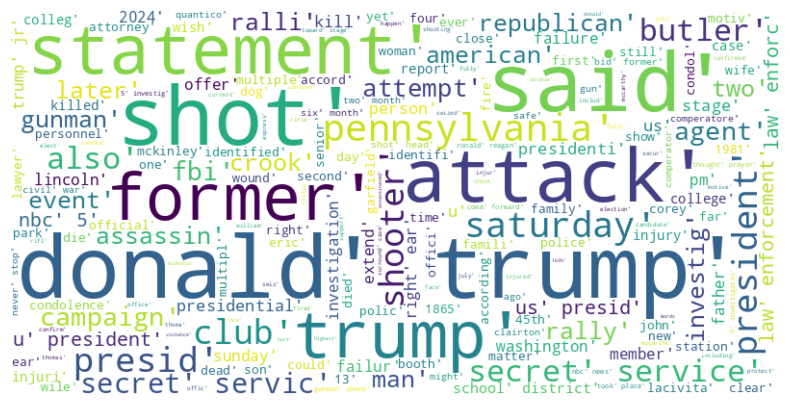

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the content of the text file
file_path = '/content/lemmatized_and_stemmed_words.csv'
with open(file_path, 'r') as file:
    text = file.read()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for this plot
plt.show()

In [47]:
!pip install flair

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.met

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


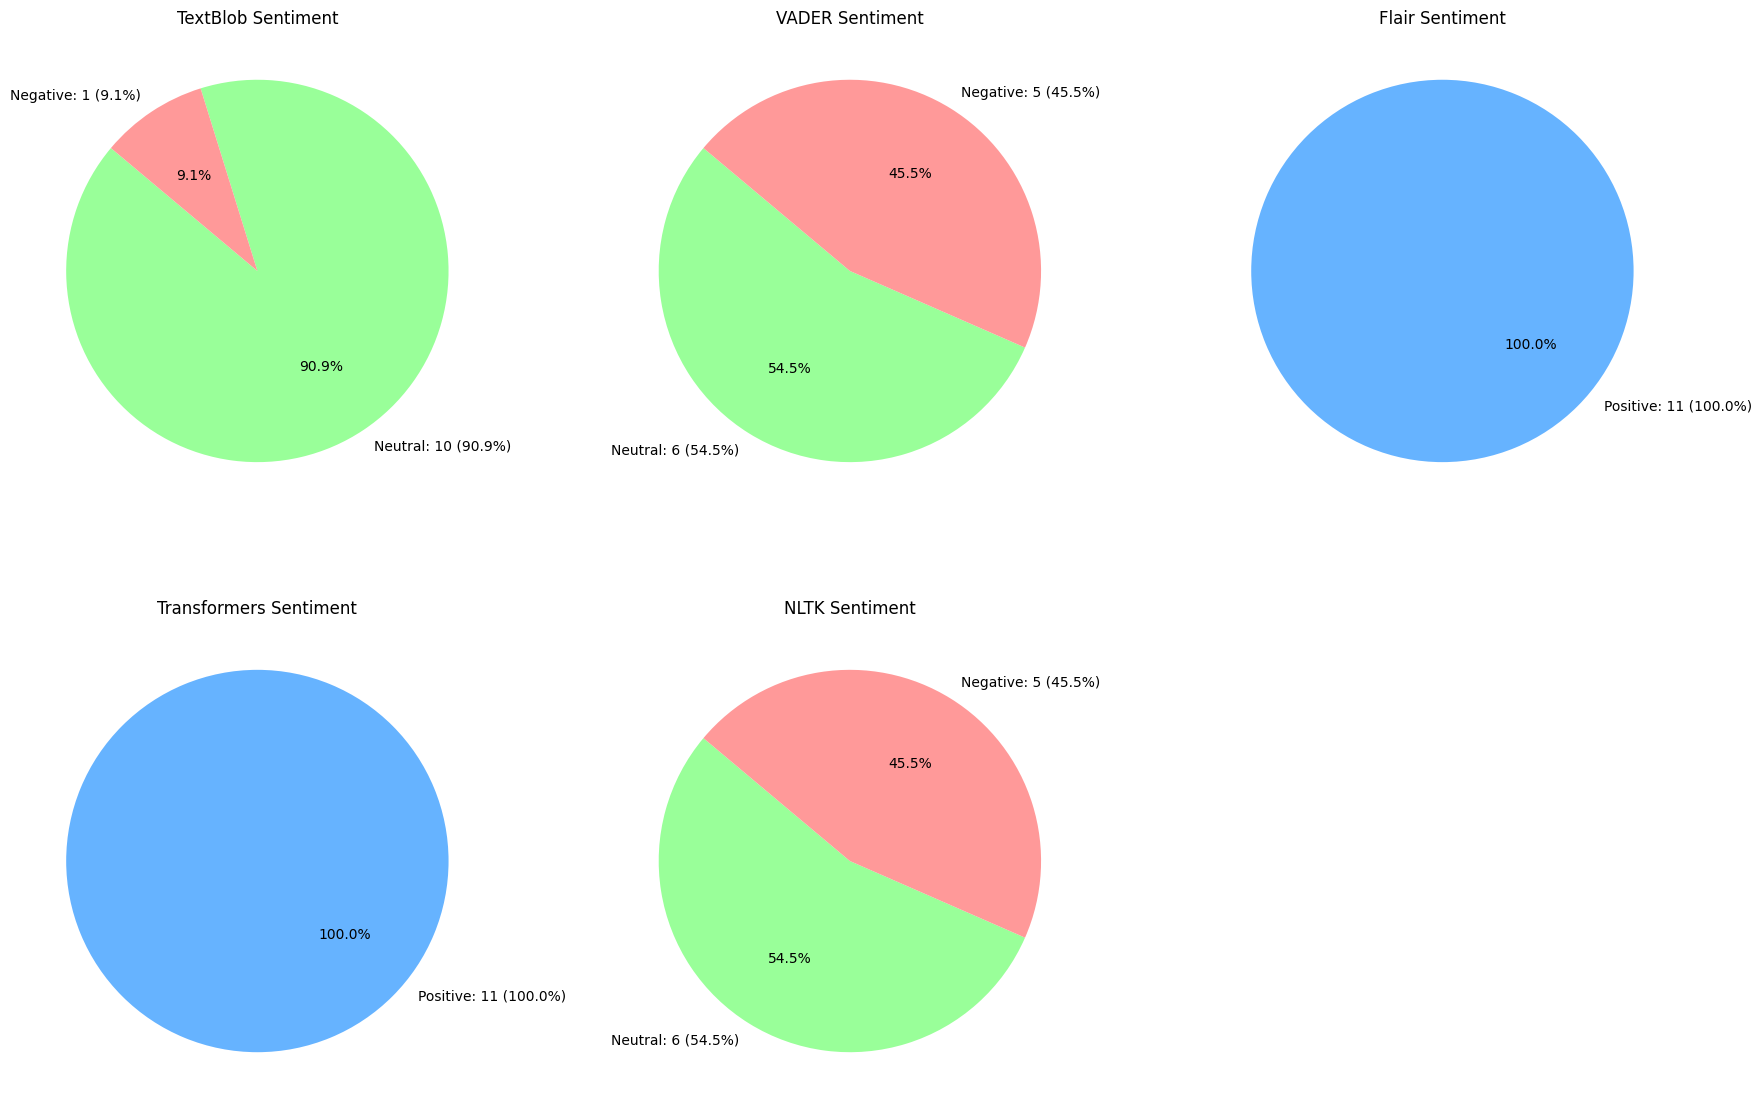

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from flair.models import TextClassifier
from flair.data import Sentence
from transformers import pipeline
import nltk

nltk.download('vader_lexicon')

# Load the file
file_path = '/content/top_articles_20240813_050112.csv'
df = pd.read_csv(file_path)

# Combine all the text from the 'Article Text' column
text_data = " ".join(df['Article Text'].dropna().tolist())

# 1. TextBlob Sentiment Analysis
def textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

df['TextBlob_Polarity'], df['TextBlob_Subjectivity'] = zip(*df['Article Text'].apply(lambda x: textblob_sentiment(str(x))))

# 2. VADER Sentiment Analysis
vader_analyzer = SentimentIntensityAnalyzer()
df['VADER_Sentiment'] = df['Article Text'].apply(lambda x: vader_analyzer.polarity_scores(str(x))['compound'])

# 3. Flair Sentiment Analysis
flair_classifier = TextClassifier.load('sentiment-fast')
def flair_sentiment(text):
    sentence = Sentence(text)
    flair_classifier.predict(sentence)
    return sentence.labels[0].score if sentence.labels else None

df['Flair_Sentiment'] = df['Article Text'].apply(lambda x: flair_sentiment(str(x)))

# 4. Hugging Face Transformers Sentiment Analysis
transformer_analyzer = pipeline('sentiment-analysis', truncation=True, max_length=512) # Truncate input text
def transformer_sentiment(text):
    result = transformer_analyzer(text)[0]
    return result['score'] if result else None

df['Transformer_Sentiment'] = df['Article Text'].apply(lambda x: transformer_sentiment(str(x)))

# 5. NLTK Sentiment Analysis (using VADER again as a separate method)
df['NLTK_Sentiment'] = df['Article Text'].apply(lambda x: vader_analyzer.polarity_scores(str(x))['compound'])

# Define function to categorize sentiment scores
def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Categorize sentiment for each analysis
df['TextBlob_Category'] = df['TextBlob_Polarity'].apply(categorize_sentiment)
df['VADER_Category'] = df['VADER_Sentiment'].apply(categorize_sentiment)
df['Flair_Category'] = df['Flair_Sentiment'].apply(categorize_sentiment)
df['Transformer_Category'] = df['Transformer_Sentiment'].apply(categorize_sentiment)
df['NLTK_Category'] = df['NLTK_Sentiment'].apply(categorize_sentiment)

# Define consistent colors for sentiment categories
colors = {'Positive': '#66b3ff', 'Negative': '#ff9999', 'Neutral': '#99ff99'}

# Visualization using pie charts
plt.figure(figsize=(18, 12))

# 1. TextBlob Sentiment Pie Chart
plt.subplot(2, 3, 1)
textblob_counts = df['TextBlob_Category'].value_counts()
plt.pie(textblob_counts, labels=[f'{label}: {count} ({100*count/sum(textblob_counts):.1f}%)' for label, count in textblob_counts.items()],
        autopct='%1.1f%%', colors=[colors[label] for label in textblob_counts.index], startangle=140)
plt.title('TextBlob Sentiment')

# 2. VADER Sentiment Pie Chart
plt.subplot(2, 3, 2)
vader_counts = df['VADER_Category'].value_counts()
plt.pie(vader_counts, labels=[f'{label}: {count} ({100*count/sum(vader_counts):.1f}%)' for label, count in vader_counts.items()],
        autopct='%1.1f%%', colors=[colors[label] for label in vader_counts.index], startangle=140)
plt.title('VADER Sentiment')

# 3. Flair Sentiment Pie Chart
plt.subplot(2, 3, 3)
flair_counts = df['Flair_Category'].value_counts()
plt.pie(flair_counts, labels=[f'{label}: {count} ({100*count/sum(flair_counts):.1f}%)' for label, count in flair_counts.items()],
        autopct='%1.1f%%', colors=[colors[label] for label in flair_counts.index], startangle=140)
plt.title('Flair Sentiment')

# 4. Transformers Sentiment Pie Chart
plt.subplot(2, 3, 4)
transformer_counts = df['Transformer_Category'].value_counts()
plt.pie(transformer_counts, labels=[f'{label}: {count} ({100*count/sum(transformer_counts):.1f}%)' for label, count in transformer_counts.items()],
        autopct='%1.1f%%', colors=[colors[label] for label in transformer_counts.index], startangle=140)
plt.title('Transformers Sentiment')

# 5. NLTK Sentiment Pie Chart
plt.subplot(2, 3, 5)
nltk_counts = df['NLTK_Category'].value_counts()
plt.pie(nltk_counts, labels=[f'{label}: {count} ({100*count/sum(nltk_counts):.1f}%)' for label, count in nltk_counts.items()],
        autopct='%1.1f%%', colors=[colors[label] for label in nltk_counts.index], startangle=140)
plt.title('NLTK Sentiment')

plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Ensure nltk data is downloaded
nltk.download('vader_lexicon')

# Load the CSV file
file_path = '/content/top_articles_20240813_050112.csv'
df = pd.read_csv(file_path)

# Initialize VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Compute VADER sentiment scores and create the 'VADER_Sentiment' column
df['VADER_Sentiment'] = df['Article Text'].apply(lambda x: vader_analyzer.polarity_scores(str(x))['compound'])

# Define function to categorize sentiment
def categorize_sentiment(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment categorization
df['label'] = df['VADER_Sentiment'].apply(categorize_sentiment)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Article Text'].fillna(''), df['label'], test_size=0.3, random_state=42
)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(multi_class='ovr', max_iter=1000)  # 'ovr' for one-vs-rest classification
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Predict on the entire dataset
df['predicted_label'] = model.predict(vectorizer.transform(df['Article Text'].fillna('')))

# Display predictions along with original text and predicted sentiment
print(df[['Article Text', 'predicted_label']])


Accuracy: 0.25
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         3
     neutral       0.25      1.00      0.40         1

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4

                                         Article Text predicted_label
0                                                 NaN         neutral
1                                                 NaN         neutral
2                                                 NaN         neutral
3                                                 NaN         neutral
4   Republican presidential candidate and former U...         neutral
5   Donald Trump ‘assassination’ bid: Former US Pr...         neutral
6   In a sensational display, multiple shots were ...         neutral
7                                                 NaN         neutral
8   

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the CSV file
file_path = '/content/top_articles_20240813_050112.csv'
df = pd.read_csv(file_path)

# Initialize the TF-IDF Vectorizer by using "Article Text" column
vectorizer = TfidfVectorizer()

# Fit and transform the articles' text content
tfidf_matrix = vectorizer.fit_transform(df['Article Text'].fillna(''))

# Calculate cosine similarity between all articles
similarity_matrix = cosine_similarity(tfidf_matrix)

# Calculate the overall similarity score as the mean of all similarity scores
overall_score = similarity_matrix.mean()

# Print the overall score
print(f"Overall Similarity Score (TF-IDF): {overall_score}")

Overall Similarity Score (TF-IDF): 0.12098230751949551
